<a href="https://colab.research.google.com/github/cmlakin/Machine-Learning-Final-Project----Lakin-Corrina/blob/main/MLFP_Lakin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from datetime import datetime
from google.colab import files
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from yellowbrick.regressor import ResidualsPlot
from sklearn import tree



In [ ]:
!ls
df = pd.read_excel('/content/Nashville_housing_data_2013_2016.xlsx')
df

In [3]:
cdf = df.copy()
cdf = cdf.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Parcel ID','Legal Reference', 'Grade', 'Sold As Vacant'], axis=1)
cdf = cdf.drop(['Multiple Parcels Involved in Sale', 'Owner Name', 'Tax District','Neighborhood', 'image'], axis=1)
cdf = cdf.dropna()
# cdf

In [4]:
cdf = cdf.sort_values(by='Bedrooms', ascending=False)
cdf = cdf.drop(cdf.index[23970:])

# cdf

In [5]:
cdf = cdf.sort_values(by='Acreage', ascending=True)
cdf = cdf.drop(cdf.index[23900:])
# cdf

In [6]:
cdf = cdf.sort_values(by='Finished Area', ascending=True)
cdf['Finished Area'] = cdf['Finished Area'].astype(int)
cdf = cdf.drop(cdf.index[20086:])
# cdf

In [7]:
cdf = cdf.sort_values(by='Sale Price', ascending=True)
cdf = cdf.drop(cdf.index[8500:])
# cdf

In [8]:
cdf = cdf.sort_values(by='Full Bath', ascending=False)
cdf = cdf.drop(cdf.index[8497:])
# cdf

In [ ]:
cdf['Full Bath'].unique()

In [10]:
cdf['Land_Use'] = cdf['Land Use']
cdf['Foundation_Type'] = cdf['Foundation Type']
cdf['Exterior_Wall'] = cdf['Exterior Wall']

cdf = cdf.drop(['Land Use', 'Foundation Type', 'Exterior Wall'], axis=1)
cdf = cdf[cdf.Land_Use != 'CHURCH']
cdf = cdf[cdf.Land_Use != 'DAY CARE CENTER']
cdf = cdf[cdf.Land_Use != 'DORMITORY/BOARDING HOUSE']
cdf = cdf[cdf.Land_Use != 'NON-PROFIT CHARITABLE SERVICE']
cdf = cdf[cdf.Land_Use != 'OFFICE BLDG (ONE OR TWO STORIES)']
cdf = cdf[cdf.Land_Use != 'PARSONAGE']
cdf = cdf[cdf.Land_Use != 'SPLIT CLASS']
cdf = cdf[cdf.Land_Use != 'ZERO LOT LINE']
cdf = cdf[cdf.Land_Use != 'MOBILE HOME']
cdf = cdf[cdf.Land_Use != 'RESIDENTIAL COMBO/MISC']
cdf = cdf[cdf.Land_Use != 'VACANT RES LAND']
cdf = cdf[cdf.Land_Use != 'VACANT RESIDENTIAL LAND']
cdf = cdf[cdf.Land_Use != 'QUADPLEX']

cdf = cdf[cdf.Foundation_Type != 'PIERS']

cdf = cdf[cdf.Exterior_Wall != 'CONC BLK']
cdf = cdf[cdf.Exterior_Wall != 'LOG']
cdf = cdf[cdf.Exterior_Wall != 'METAL']

cdf = cdf[cdf.Bedrooms <= 6]

# cdf

In [11]:
cdf['Sale Price'] = cdf['Sale Price'].astype(float)
# cdf.dtypes

In [12]:
# 5 - Three aggregated coumns using groupby and transform
cdf['Avg_Price_By_Bedrooms'] = cdf.groupby('Bedrooms')['Sale Price'].transform('mean')
cdf['Avg_Price_By_Bedrooms'] = cdf['Avg_Price_By_Bedrooms'].astype(int)
cdf['Avg_Value_By_Bedrooms'] = cdf.groupby('Bedrooms')['Total Value'].transform('mean')
cdf['Avg_Value_By_Bedrooms'] = cdf['Avg_Value_By_Bedrooms'].astype(int)
cdf['Sales_by_city_count'] = cdf.groupby('Property City')['Land_Use'].transform('count')
# cdf

In [13]:

land_use_map = { 'SINGLE FAMILY': 1,
                 'DUPLEX': 2,
                 'TRIPLEX': 3 }

cdf = cdf.replace({'Land_Use' : land_use_map})
# cdf

In [14]:
# 4 - label-encoded, numbers associated with the type of property
le = LabelEncoder()
y_data = le.fit_transform(cdf['Total Value'])
cdf['Property_Address'] = le.fit_transform(cdf['Property Address'])
cdf['Property_City'] = le.fit_transform(cdf['Property City'])
cdf['Foundation'] = le.fit_transform(cdf['Foundation_Type'])
cdf['Exterior'] = le.fit_transform(cdf['Exterior_Wall'])
# cdf

# cdf['Property City'] = le.fit_transform(cdf['Property City'])

x_data = cdf.drop(columns=['Property Address', 'Total Value', 'Property City', 'Sale Date', 'Address', 'City',
                           'TN', 'Foundation_Type', 'Exterior_Wall'])
x_data
# cdf
# Scaling
scaler = StandardScaler()
x_data = scaler.fit_transform(x_data)


# x_data_test
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.10, random_state=1)

model = linear_model.LinearRegression()


In [15]:
# train
model = model.fit(x_train, y_train)

# reg.score(x_test, y_test)
model.score(x_test, y_test)

0.8929448790345997

In [16]:
model.score(x_train, y_train)

0.88386214901877

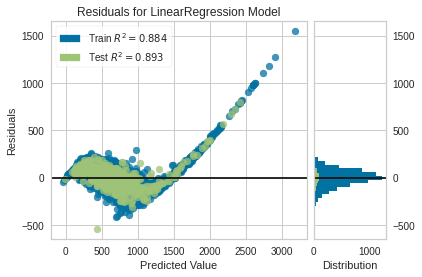

In [17]:
visual = ResidualsPlot(model)
visual.fit(x_train, y_train)
visual.score(x_test, y_test)
visual.poof()

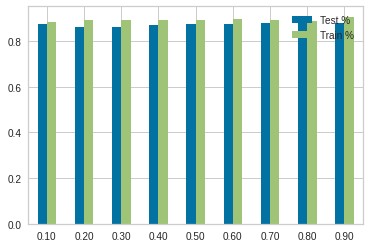

In [18]:
test_percent = [0.874, 0.861, 0.864, 0.870, 0.874, 0.876, 0.880, 0.880, 0.878]
 
train_percent = [0.886, 0.891, 0.893, 0.894, 0.894, 0.896, 0.894, 0.889, 0.907]
 
index = ['0.10', '0.20', '0.30', '0.40', '0.50', '0.60', '0.70', '0.80', '0.90']
 
txdf = pd.DataFrame({'Test %': test_percent,
 
                   'Train %': train_percent}, index=index)
 
ax = txdf.plot.bar(rot=0)

In [19]:
# decision tree
clf = tree.DecisionTreeClassifier()

reg = clf

reg = reg.fit(x_train, y_train)
reg.score(x_test, y_test)

0.13788487282463185

In [21]:
clf = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=3, min_samples_leaf=5)   
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [23]:
y_predict = clf.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_predict)

0.008032128514056224

In [29]:
target = list(cdf['Total Value'].unique())
feature_names = list(x_data) 
import graphviz
dot_data = tree.export_graphviz(clf,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

graph

ValueError: ignored

In [ ]:
# #  pandas one hot encoding
# temp = pd.get_dummies(cdf['Property City'])
# temp

In [15]:
#  Used to get the couns for Avg Sale Price based on number of bedrooms

# one_bed_cdf = cdf[cdf.Bedrooms == 1]
# one_bed_cdf
# two_bed_cdf = cdf[cdf.Bedrooms == 2]
# two_bed_cdf
# three_bed_cdf = cdf[cdf.Bedrooms == 3]
# three_bed_cdf
# four_bed_cdf = cdf[cdf.Bedrooms == 4]
# four_bed_cdf
# five_bed_cdf = cdf[cdf.Bedrooms == 5]
# five_bed_cdf
# six_bed_cdf = cdf[cdf.Bedrooms == 6]
# six_bed_cdf

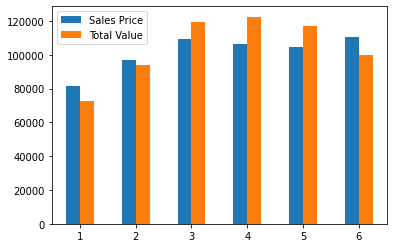

In [12]:
sales_price_avg = [81309, 96626, 109277, 106464, 104658, 110787]
 
total_value_avg = [72579, 93957, 119155, 122495, 117163, 99624]
 
index = ['1', '2', '3', '4', '5', '6']
 
tdf = pd.DataFrame({'Sales Price': sales_price_avg,
 
                   'Total Value': total_value_avg}, index=index)
 
ax = tdf.plot.bar(rot=0)

In [ ]:

sns.set(rc={'figure.figsize': (13, 9)})
sns.lmplot(data = cdf, x='Bedrooms', y='Sale Price', col='Land Use', hue='Land Use')
# sns.lmplot(data = cdf, x='Bedrooms', y='Sale Price', col = 'Property City', hue='Property City')

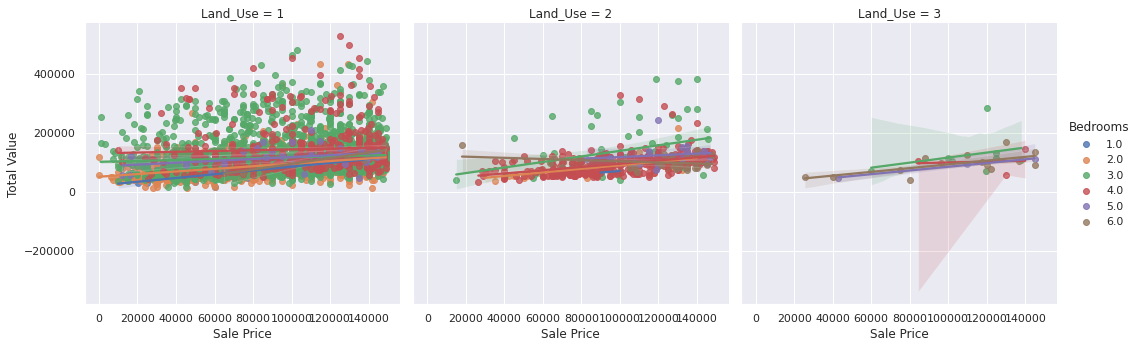

In [39]:
sns.lmplot(data = cdf, y='Total Value', x='Sale Price', col='Land_Use',  hue='Bedrooms')

In [42]:

fig = px.scatter_3d(cdf, x='Total Value', y='Sale Price', z="Bedrooms", 
                    color='Land Use', size='Bedrooms', size_max= 20, 
                    symbol='Land Use', opacity=1)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [13]:
tdf = cdf[cdf.Bedrooms >= 3]
tdf = tdf[tdf.Bedrooms < 6]

tdf = tdf[tdf.Exterior_Wall != 'STUCCO']
tdf = tdf[tdf.Exterior_Wall != 'STONE']
tdf = tdf[tdf.Exterior_Wall != 'FRAME/STONE']

fig = px.scatter_3d(tdf, x='Total Value', y='Sale Price', z="Bedrooms", 
                    color='Exterior_Wall', size='Bedrooms', size_max= 10, 
                    symbol='Exterior_Wall', opacity=1)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

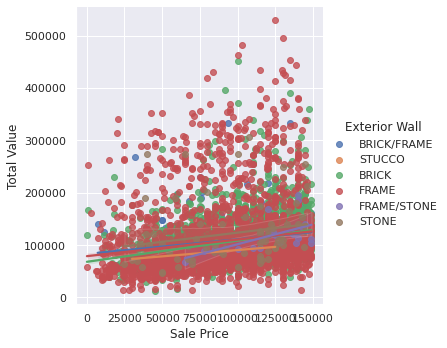

In [25]:
sns.lmplot(data = cdf, y='Total Value', x='Sale Price', hue='Exterior Wall')

In [96]:
temp = cdf.sample(n=500) 

temp

,Property Address,Property City,Sale Date,Sale Price,Address,City,TN,Acreage,Land Value,Building Value,...,Land_Use,Foundation_Type,Exterior_Wall,Avg_Price_By_Bedrooms,Avg_Value_By_Bedrooms,Sales_by_city_count,Property_Address,Property_City,Foundation,Exterior
33847,2316 MAPLECREST DR,NASHVILLE,2015-04-22,105000.0,2316 MAPLECREST DR,NASHVILLE,TN,0.59,22000.0,75400.0,...,1,CRAWL,BRICK,109277,119155,4937,2418,6,0,0
29867,4508 HELMWOOD DR,NASHVILLE,2013-10-29,112250.0,4508 HELMWOOD DR,NASHVILLE,TN,0.35,30000.0,90000.0,...,1,CRAWL,BRICK,109277,119155,4937,4909,6,0,0
29319,3842 HUTSON AVE,NASHVILLE,2013-10-15,116000.0,3842 HUTSON AVE,NASHVILLE,TN,0.34,18000.0,110500.0,...,1,CRAWL,FRAME,109277,119155,4937,4359,6,0,2
24453,4657 FANNING DR,ANTIOCH,2014-05-09,95360.0,4657 FANNING DR,ANTIOCH,TN,0.24,18000.0,71000.0,...,1,FULL BSMT,BRICK,96626,93957,756,4984,0,1,0
17141,904 S 14TH ST,NASHVILLE,2015-06-10,115000.0,904 S 14TH ST,NASHVILLE,TN,0.13,25000.0,96600.0,...,1,CRAWL,FRAME,109277,119155,4937,6679,6,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24221,4640 LONG BR,ANTIOCH,2016-04-13,110999.0,4640 LONG BR,ANTIOCH,TN,0.23,15500.0,76500.0,...,1,FULL BSMT,FRAME,109277,119155,756,4977,0,1,2
29066,2823 BLUE BRICK DR,NASHVILLE,2013-12-30,88000.0,2823 BLUE BRICK DR,NASHVILLE,TN,0.33,21000.0,87700.0,...,1,PT BSMT,FRAME,106464,122495,4937,2970,6,2,2
33142,503 JANETTE AVE,GOODLETTSVILLE,2013-06-14,60000.0,371 JANETTE AVE,GOODLETTSVILLE,TN,0.51,28800.0,91800.0,...,1,CRAWL,BRICK,106464,122495,163,5301,1,0,0
31440,709 TINA CT,ANTIOCH,2015-10-22,105000.0,709 TINA CT,ANTIOCH,TN,0.41,15500.0,74200.0,...,1,SLAB,FRAME,109277,119155,756,6219,0,3,2


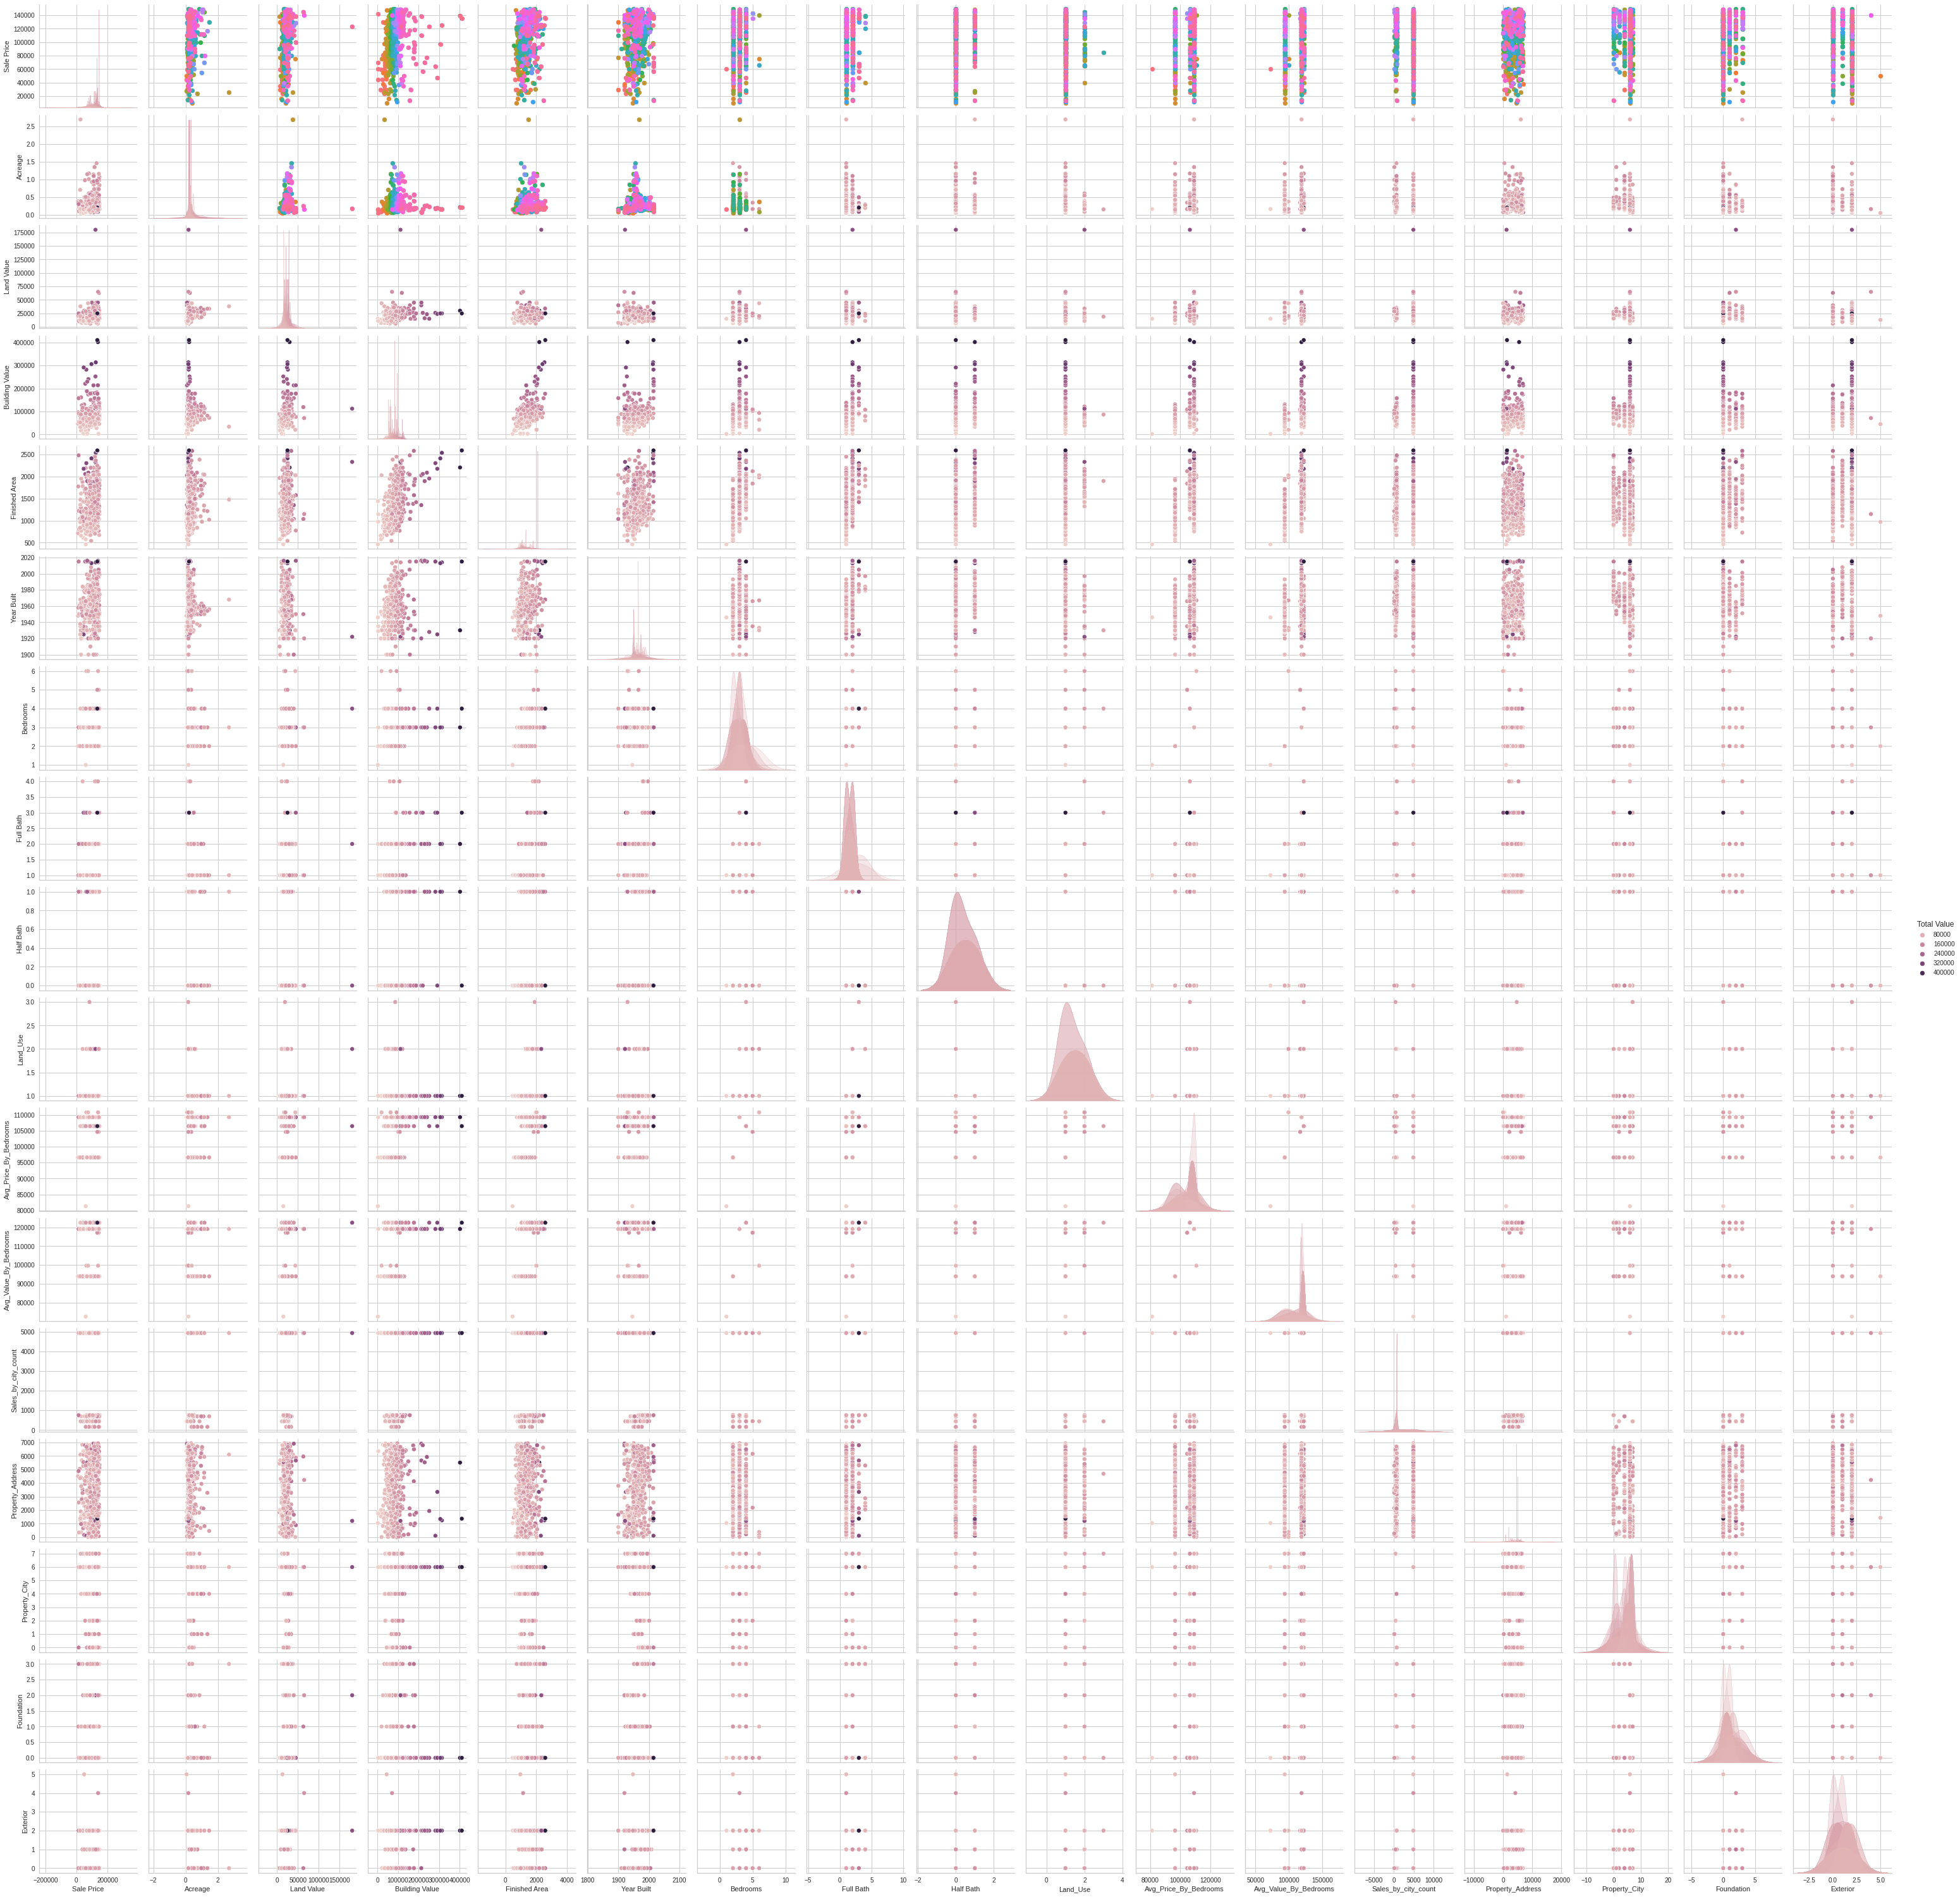

In [98]:
# plot = sns.pairplot(temp, hue='Total Value')
# plot = plot.map_upper(plt.scatter)
# plot = plot.map_lower(sns.kdeplot)